<a href="https://colab.research.google.com/github/Alicia-Alexia/Alicia-Alexia/blob/main/big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import matplotlib.pyplot as plt

# 1. Download do dataset
# O caminho para o dataset é retornado para a variável 'path'
path = kagglehub.dataset_download("devashish0507/big-mart-sales-prediction")

print("Path to dataset files:", path)

# 2. Construa o caminho completo para o arquivo
# O arquivo principal do dataset "big-mart-sales-prediction" é tipicamente 'Train.csv'
# Você deve verificar o nome exato do arquivo no diretório baixado
file_path = f"{path}/Train.csv"

# 3. Carregue o arquivo em um DataFrame do Pandas
try:
    df = pd.read_csv(file_path)

    # 4. Visualize os dados
    print("\nDados do dataset (as 5 primeiras linhas):")
    print(df.head())

    print("\nInformações sobre o dataset:")
    print(df.info())

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Verifique o nome do arquivo no diretório.")

Path to dataset files: /kaggle/input/big-mart-sales-prediction

Dados do dataset (as 5 primeiras linhas):
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                 

In [ ]:
display(df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# --- Análise e Estatísticas Descritivas ---

# 1. Calcular médias para entender a distribuição dos dados
# Focar em colunas que influenciam as vendas e o comportamento dos clientes.
print("--- Estatísticas Médias ---")
print(f"Média de Visibilidade do Item (Item_Visibility): {df['Item_Visibility'].mean():.2f}")
print(f"Média de Vendas por Outlet (Item_Outlet_Sales): {df['Item_Outlet_Sales'].mean():.2f}")
print(f"Média do Preço Máximo de Varejo (Item_MRP): {df['Item_MRP'].mean():.2f}")

--- Estatísticas Médias ---
Média de Visibilidade do Item (Item_Visibility): 0.07
Média de Vendas por Outlet (Item_Outlet_Sales): 2181.29
Média do Preço Máximo de Varejo (Item_MRP): 140.99


In [ ]:
# --- Análise de Extremos ---

# 2. Encontrar a maior e a menor venda para identificar os extremos do dataset
# Isso ajuda a entender a variação dos dados e possíveis outliers.
print("\n--- Análise de Extremos ---")
max_sales_item = df[df['Item_Outlet_Sales'] == df['Item_Outlet_Sales'].max()]
print("Item com a maior venda:")
display(max_sales_item)

min_sales_item = df[df['Item_Outlet_Sales'] == df['Item_Outlet_Sales'].min()]
print("\nItem com a menor venda:")
display(min_sales_item)


--- Análise de Extremos ---
Item com a maior venda:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,21.1,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648



Item com a menor venda:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.89,OUT010,1998,NaN,Tier 3,Grocery Store,33.29
6950,NCR42,9.105,Low Fat,0.064411,Household,33.39,OUT010,1998,NaN,Tier 3,Grocery Store,33.29


In [ ]:
# --- Análise e Visualização de Visibilidade e Vendas ---

# 3. Filtrar e comparar dados com base na visibilidade
# A 'máscara' booleana é uma forma eficiente de filtrar o DataFrame.
print("\n--- Análise de Visibilidade e Vendas ---")
alta_visibilidade_mask = df['Item_Visibility'] >= df['Item_Visibility'].mean()
display(alta_visibilidade_mask)

# Comparar vendas médias de itens com alta vs. baixa visibilidade
vendas_alta_visibilidade = df[alta_visibilidade_mask]['Item_Outlet_Sales'].mean()
vendas_baixa_visibilidade = df[~alta_visibilidade_mask]['Item_Outlet_Sales'].mean()

# Comparar preços médios de itens com alta vs. baixa visibilidade
preco_alta_visibilidade = df[alta_visibilidade_mask]['Item_MRP'].mean()
preco_baixa_visibilidade = df[~alta_visibilidade_mask]['Item_MRP'].mean()


--- Análise de Visibilidade e Vendas ---


,Item_Visibility
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,True


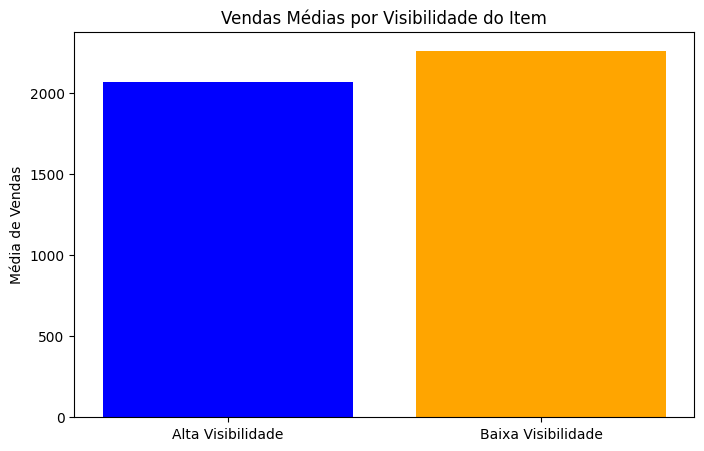

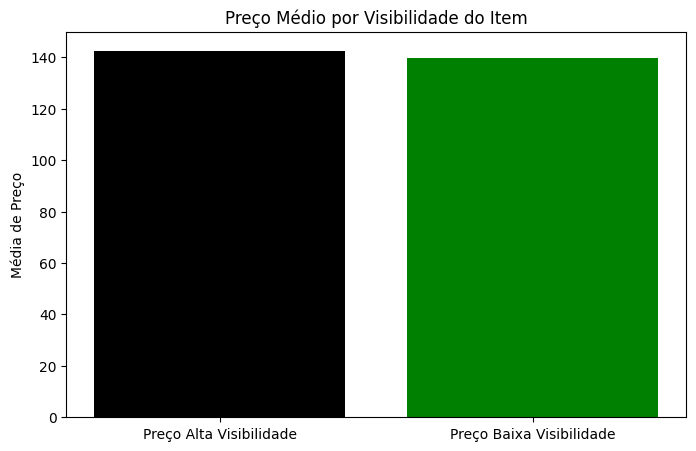

In [ ]:
# 4. Criar gráficos para visualizar as comparações
# Gráfico 1: Vendas Médias por Visibilidade
plt.figure(figsize=(8, 5))
plt.bar(['Alta Visibilidade', 'Baixa Visibilidade'],
        [vendas_alta_visibilidade, vendas_baixa_visibilidade],
        color=['blue', 'orange'])
plt.title('Vendas Médias por Visibilidade do Item')
plt.ylabel('Média de Vendas')
plt.show()

# Gráfico 2: Preço Médio por Visibilidade
plt.figure(figsize=(8, 5))
plt.bar(['Preço Alta Visibilidade', 'Preço Baixa Visibilidade'],
        [preco_alta_visibilidade, preco_baixa_visibilidade],
        color=['black', 'green'])
plt.title('Preço Médio por Visibilidade do Item')
plt.ylabel('Média de Preço')
plt.show()

In [ ]:

# --- Análise Agrupada por Categorias ---

# 5. Agrupar dados para entender o impacto de variáveis categóricas
print("\n--- Análise por Categorias ---")

# Vendas por Tipo de Item
vendas_por_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
display(vendas_por_item_type)

# Vendas por Tipo de Outlet
vendas_por_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
display(vendas_por_outlet_type)

# Vendas por Tamanho de Outlet
vendas_por_outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
display(vendas_por_outlet_size)

# Vendas por combinação de Tipo de Outlet e Tipo de Item
vendas_por_tipo_e_item = df.groupby(['Outlet_Type', 'Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
display("Média de Vendas por Tipo de Outlet e Tipo de Item:")
display(vendas_por_tipo_e_item)



--- Análise por Categorias ---


,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


,Item_Outlet_Sales
Outlet_Type,
Supermarket Type3,3694.038558
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,339.828500


,Item_Outlet_Sales
Outlet_Size,
Medium,2681.603542
High,2298.995256
Small,1912.149161


'Média de Vendas por Tipo de Outlet e Tipo de Item:'

Outlet_Type        Item_Type            
Supermarket Type3  Breakfast                4584.759327
                   Fruits and Vegetables    4114.487061
                   Dairy                    3915.182245
                   Meat                     3862.293911
                   Household                3821.207782
                                               ...     
Grocery Store      Starchy Foods             300.122154
                   Baking Goods              292.082544
                   Others                    288.094126
                   Hard Drinks               243.155708
                   Seafood                   228.435980
Name: Item_Outlet_Sales, Length: 64, dtype: float64

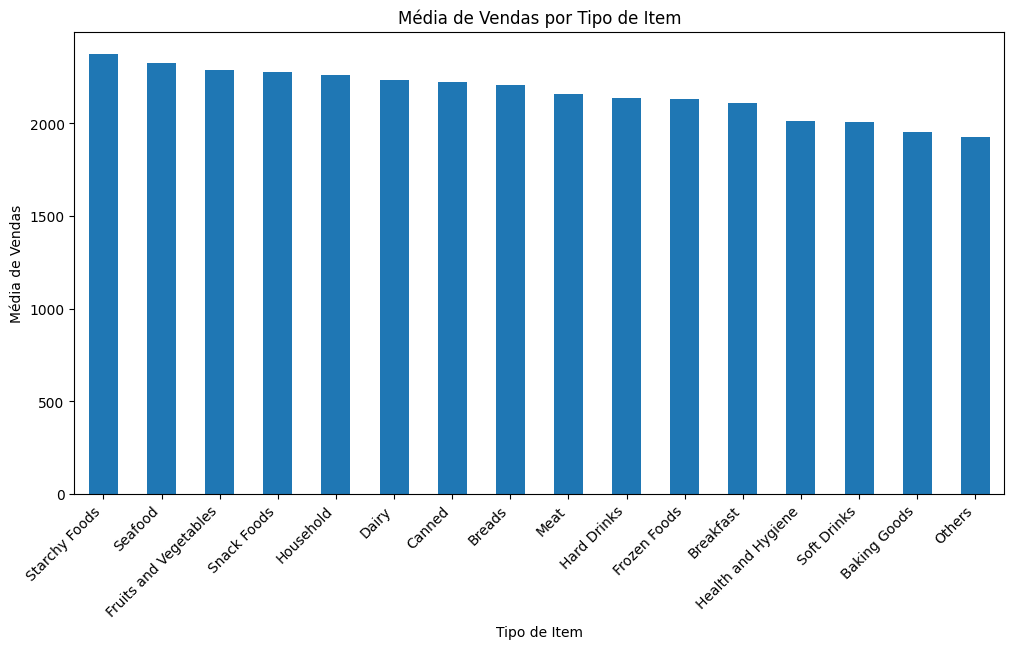

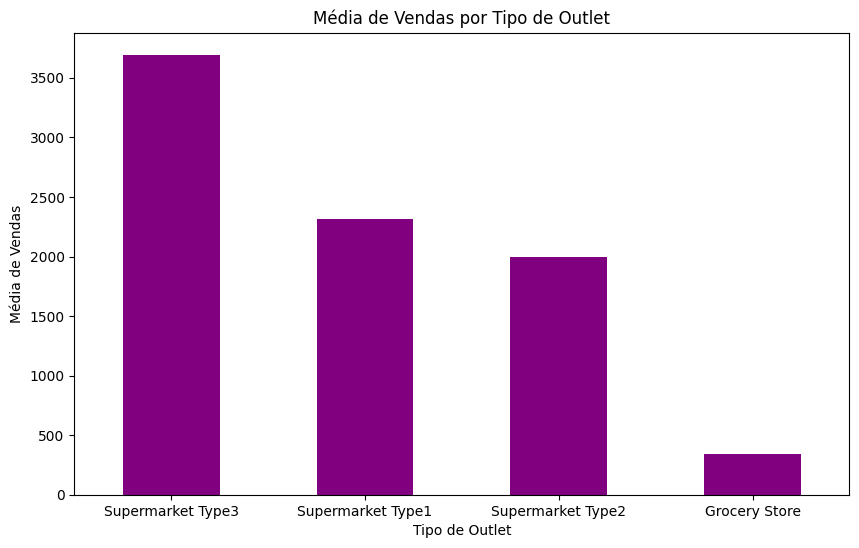

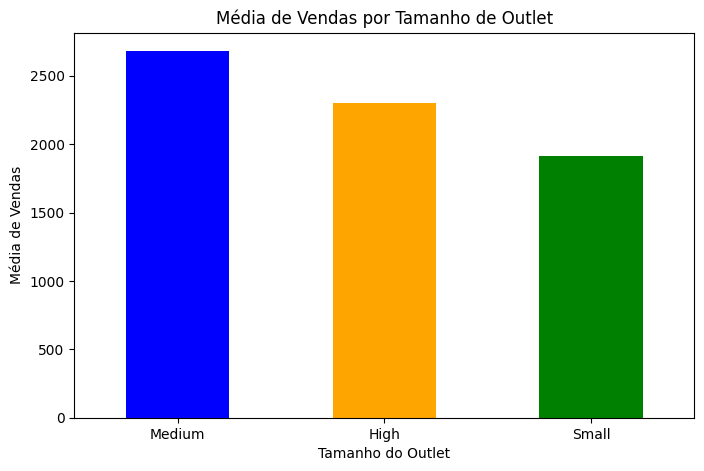

In [ ]:
# 6. Visualizar as análises agrupadas
# A função .plot() do pandas simplifica a criação de gráficos de barras para dados agrupados.
plt.figure(figsize=(12, 6))
vendas_por_item_type.plot(kind='bar')
plt.title('Média de Vendas por Tipo de Item')
plt.xlabel('Tipo de Item')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
vendas_por_outlet_type.plot(kind='bar', color='purple')
plt.title('Média de Vendas por Tipo de Outlet')
plt.xlabel('Tipo de Outlet')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
vendas_por_outlet_size.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Média de Vendas por Tamanho de Outlet')
plt.xlabel('Tamanho do Outlet')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# --- Tratamento de Valores Ausentes (Exemplo com Item_Weight) ---

# 7. Imputar (preencher) valores nulos de forma precisa
# Usamos a média do peso para cada item único (Item_Identifier).
# Isso é mais preciso do que a média geral, pois mantém a consistência dos dados.
print("\n--- Tratamento de Dados Ausentes ---")

# Antes de preencher
print(f"Valores nulos em 'Item_Weight' antes do preenchimento: {df['Item_Weight'].isnull().sum()}")

# 8. Preencher NaNs com a média por grupo de Item_Identifier
# O método 'transform' é ideal, pois retorna uma Série com o mesmo tamanho do DataFrame.
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')

# 9. Preencher quaisquer NaNs restantes com a média global
# Se um Item_Identifier não tiver nenhum peso registrado, seu peso médio será NaN.
# Preenchemos esses poucos valores restantes com a média geral para garantir que não haja nulos.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Depois de preencher
print(f"Valores nulos em 'Item_Weight' após o preenchimento: {df['Item_Weight'].isnull().sum()}")


--- Tratamento de Dados Ausentes ---
Valores nulos em 'Item_Weight' antes do preenchimento: 0
Valores nulos em 'Item_Weight' após o preenchimento: 0


/tmp/ipython-input-3578425738.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
